In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

sns.set_theme()
%config InlineBackend.figure_format = 'retina'

# Visualiazación de la información - Tarea 4
**Andrés Urbano Guillermo Gerardo**

In [2]:
# Leemos el conjunto de datos
df = pd.read_csv('linelist_cleaned.csv')
df.head()

,case_id,generation,date_infection,date_onset,date_hospitalisation,date_outcome,outcome,gender,age,age_unit,...,ct_blood,fever,chills,cough,aches,vomit,temp,time_admission,bmi,days_onset_hosp
0,5fe599,4,05/08/2014,05/13/2014,05/15/2014,NaN,NaN,m,2.0,years,...,22,no,no,yes,no,yes,36.8,NaN,117.187500,2.0
1,8689b7,4,NaN,05/13/2014,05/14/2014,05/18/2014,Recover,f,3.0,years,...,22,NaN,NaN,NaN,NaN,NaN,36.9,09:36,71.818443,1.0
2,11f8ea,2,NaN,05/16/2014,05/18/2014,05/30/2014,Recover,m,56.0,years,...,21,NaN,NaN,NaN,NaN,NaN,36.9,16:48,16.065250,2.0
3,b8812a,3,05/04/2014,05/18/2014,05/20/2014,NaN,NaN,f,18.0,years,...,23,no,no,no,no,no,36.8,11:22,22.496571,2.0
4,893f25,3,05/18/2014,05/21/2014,05/22/2014,05/29/2014,Recover,m,3.0,years,...,23,no,no,yes,no,yes,36.9,12:60,71.414402,1.0


Elabore una gráfica (la que considere conveniente) que muestre una distribución sobre la
cantidad de casos de Ébola en relación con la edad de los pacientes (age).

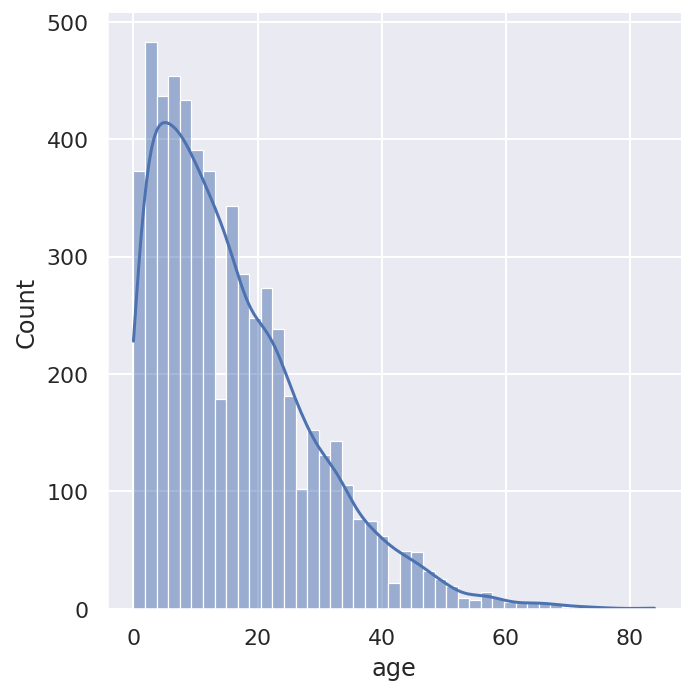

In [3]:
sns.displot(df['age'], kde=True);

Vemos que en los casos de ébola por edad podrían seguir ya sea un distribución exponencial, Ji cuadrada o binomial negativa variando los parámetros de cada distribución. Podemos decir que las personas menores de 20 años son más probables de ser contagiados ya que en ese rango acuden a los hospitales ha ser tratados. Por otra parte vemos que las personas mayores de 60 año y más son menos propensas a obtener esta enfermedad por la poco asistencia de ir a los hospitales. 

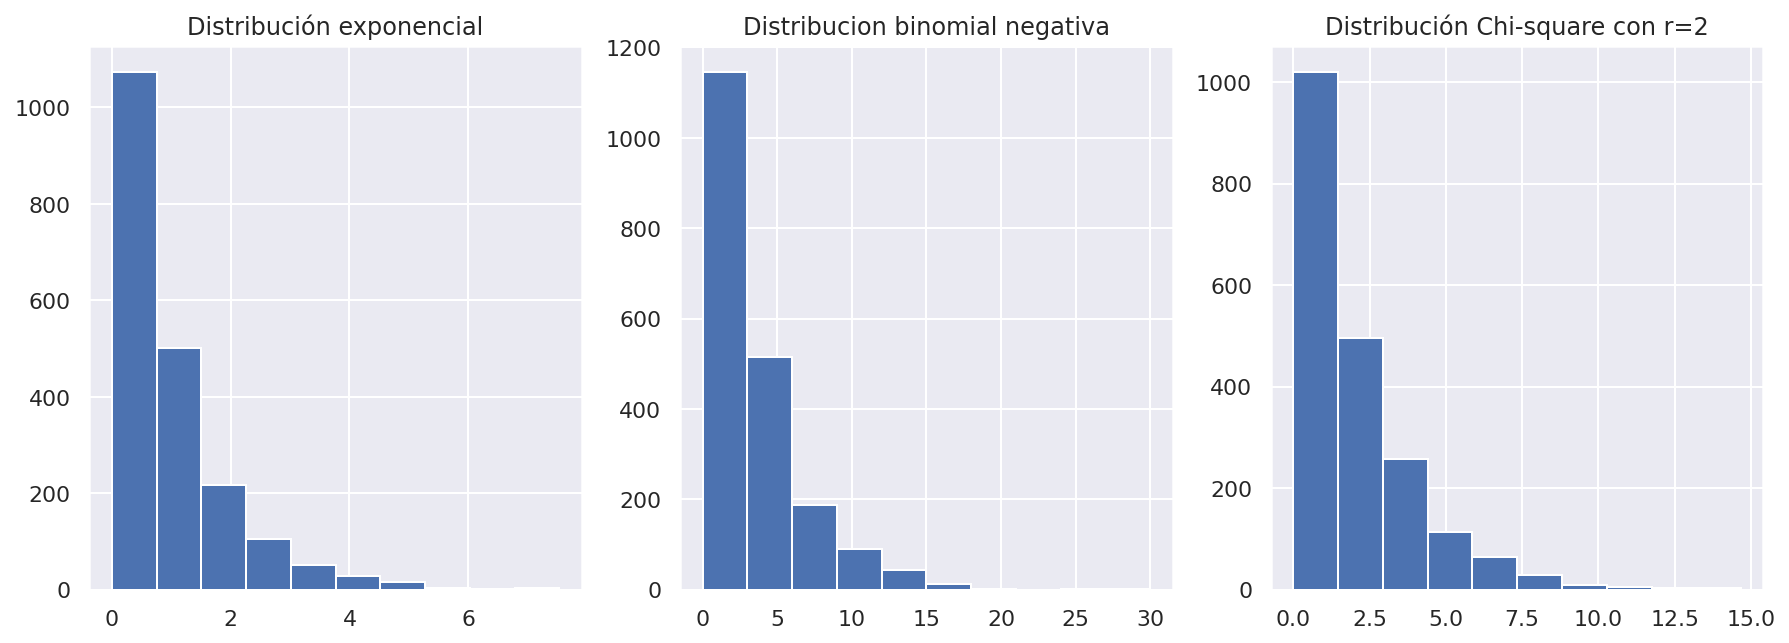

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
titles = ['Distribución exponencial', 'Distribucion binomial negativa',
          'Distribución Chi-square con r=2']
distributions = [np.random.exponential(1, 2000), np.random.negative_binomial(1, 0.25, 2000),
                 np.random.chisquare(2, 2000)]

for title, distribution, subplot in zip(titles, distributions, axes):
    subplot.hist(distribution)
    subplot.set_title(title)

## Gráfica de dispersion

Elabore una grafica de dispersión que indique el peso de los pacientes (wt_kg) en relación con
la edad de los pacientes (age) y el género (gender). Esto es, toda la información solicitada debe
observarse en una sola gráfica.

/home/guillermo/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


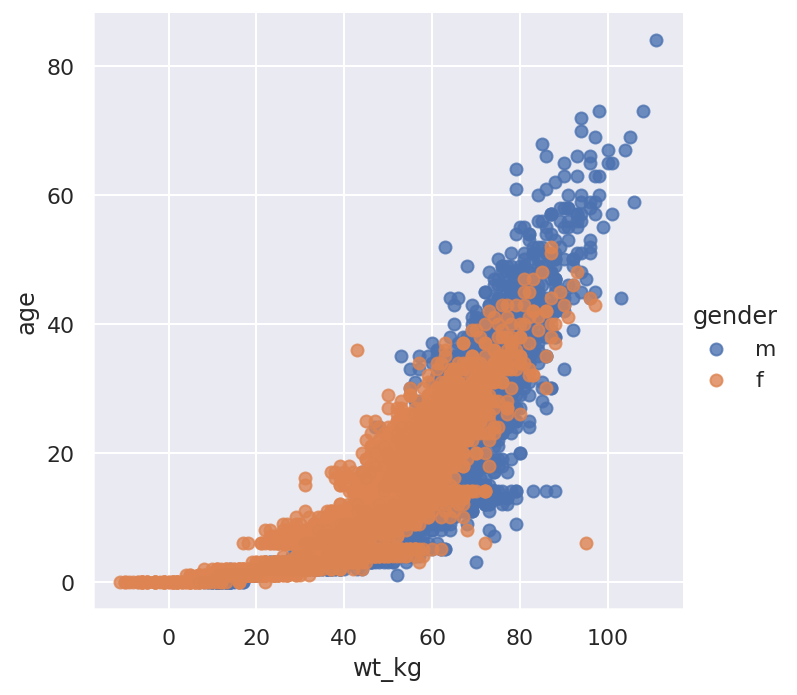

In [5]:
sns.lmplot("wt_kg", "age", data=df, hue="gender", fit_reg=False );

Vemos que existe una relación positiva entre el peso y edades de las personas. Existen pocas personas de mayores de 100 kilogramos y de 70 años en los hospitales, y que la mayoría de las  personas se encuentran teniendo entre 40 y 90 kilogramos con un rango de edad de 5 a 60 años. También la proporción entre hombres y mujeres hospitalizados esta equilibrado, sólo hay una diferencia mínima. Podemos decir que por esa diferencia que los hombres suelen enfermarse más.

## Curva epidemica

Elabore una gráfica que indique el número de casos agregados semanales por hospital.

In [6]:
hospitals = df[['hospital', 'date_hospitalisation']]
# Convertimos las fechas a objetos de tipo Date
hospitals['Date'] = pd.to_datetime(hospitals['date_hospitalisation'])
# Ordenamos las fechas
hospitals_sorted = hospitals.sort_values(by='Date')
hospitals_sorted

/tmp/ipykernel_209647/727753969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitals['Date'] = pd.to_datetime(hospitals['date_hospitalisation'])


,hospital,date_hospitalisation,Date
4590,Military Hospital,04/17/2014,2014-04-17
4591,Port Hospital,04/20/2014,2014-04-20
4593,Other,04/25/2014,2014-04-25
1339,Missing,04/27/2014,2014-04-27
4595,Other,04/29/2014,2014-04-29
...,...,...,...
1055,Military Hospital,04/29/2015,2015-04-29
1056,Port Hospital,04/30/2015,2015-04-30
4589,Other,04/30/2015,2015-04-30
4584,Military Hospital,04/30/2015,2015-04-30


In [7]:
# Calculamos las semanas en base a las fechas ordenadas
col_semana = []
dia_previo = -1
i = 1
for fecha in hospitals_sorted['Date']:
    if i == 1:
        # Iniciamos con la primer fecha
        fecha_inicio_semana = f'{fecha.day}-{fecha.month}-{fecha.year}'
        
    dia_semana = fecha.day_of_week    
    if dia_semana >= dia_previo:
        # Significa que sigue siendo la misma semana
        #col_semana.append(i)
        i += 1
        col_semana.append(fecha_inicio_semana)
        dia_previo = dia_semana
    else:
        # Significa que ya es otra semana
        fecha_inicio_semana = f'{fecha.day}-{fecha.month}-{fecha.year}'
        i += 1
        # col_semana.append(i)        
        col_semana.append(fecha_inicio_semana)
        dia_previo = dia_semana  

In [8]:
# Agregamos una nueva columna que contendra su semana correspondiente
hospitals_sorted['Semana'] = col_semana
hospitals_sorted

,hospital,date_hospitalisation,Date,Semana
4590,Military Hospital,04/17/2014,2014-04-17,17-4-2014
4591,Port Hospital,04/20/2014,2014-04-20,17-4-2014
4593,Other,04/25/2014,2014-04-25,25-4-2014
1339,Missing,04/27/2014,2014-04-27,25-4-2014
4595,Other,04/29/2014,2014-04-29,29-4-2014
...,...,...,...,...
1055,Military Hospital,04/29/2015,2015-04-29,27-4-2015
1056,Port Hospital,04/30/2015,2015-04-30,27-4-2015
4589,Other,04/30/2015,2015-04-30,27-4-2015
4584,Military Hospital,04/30/2015,2015-04-30,27-4-2015


<AxesSubplot:xlabel='Semana', ylabel='count'>

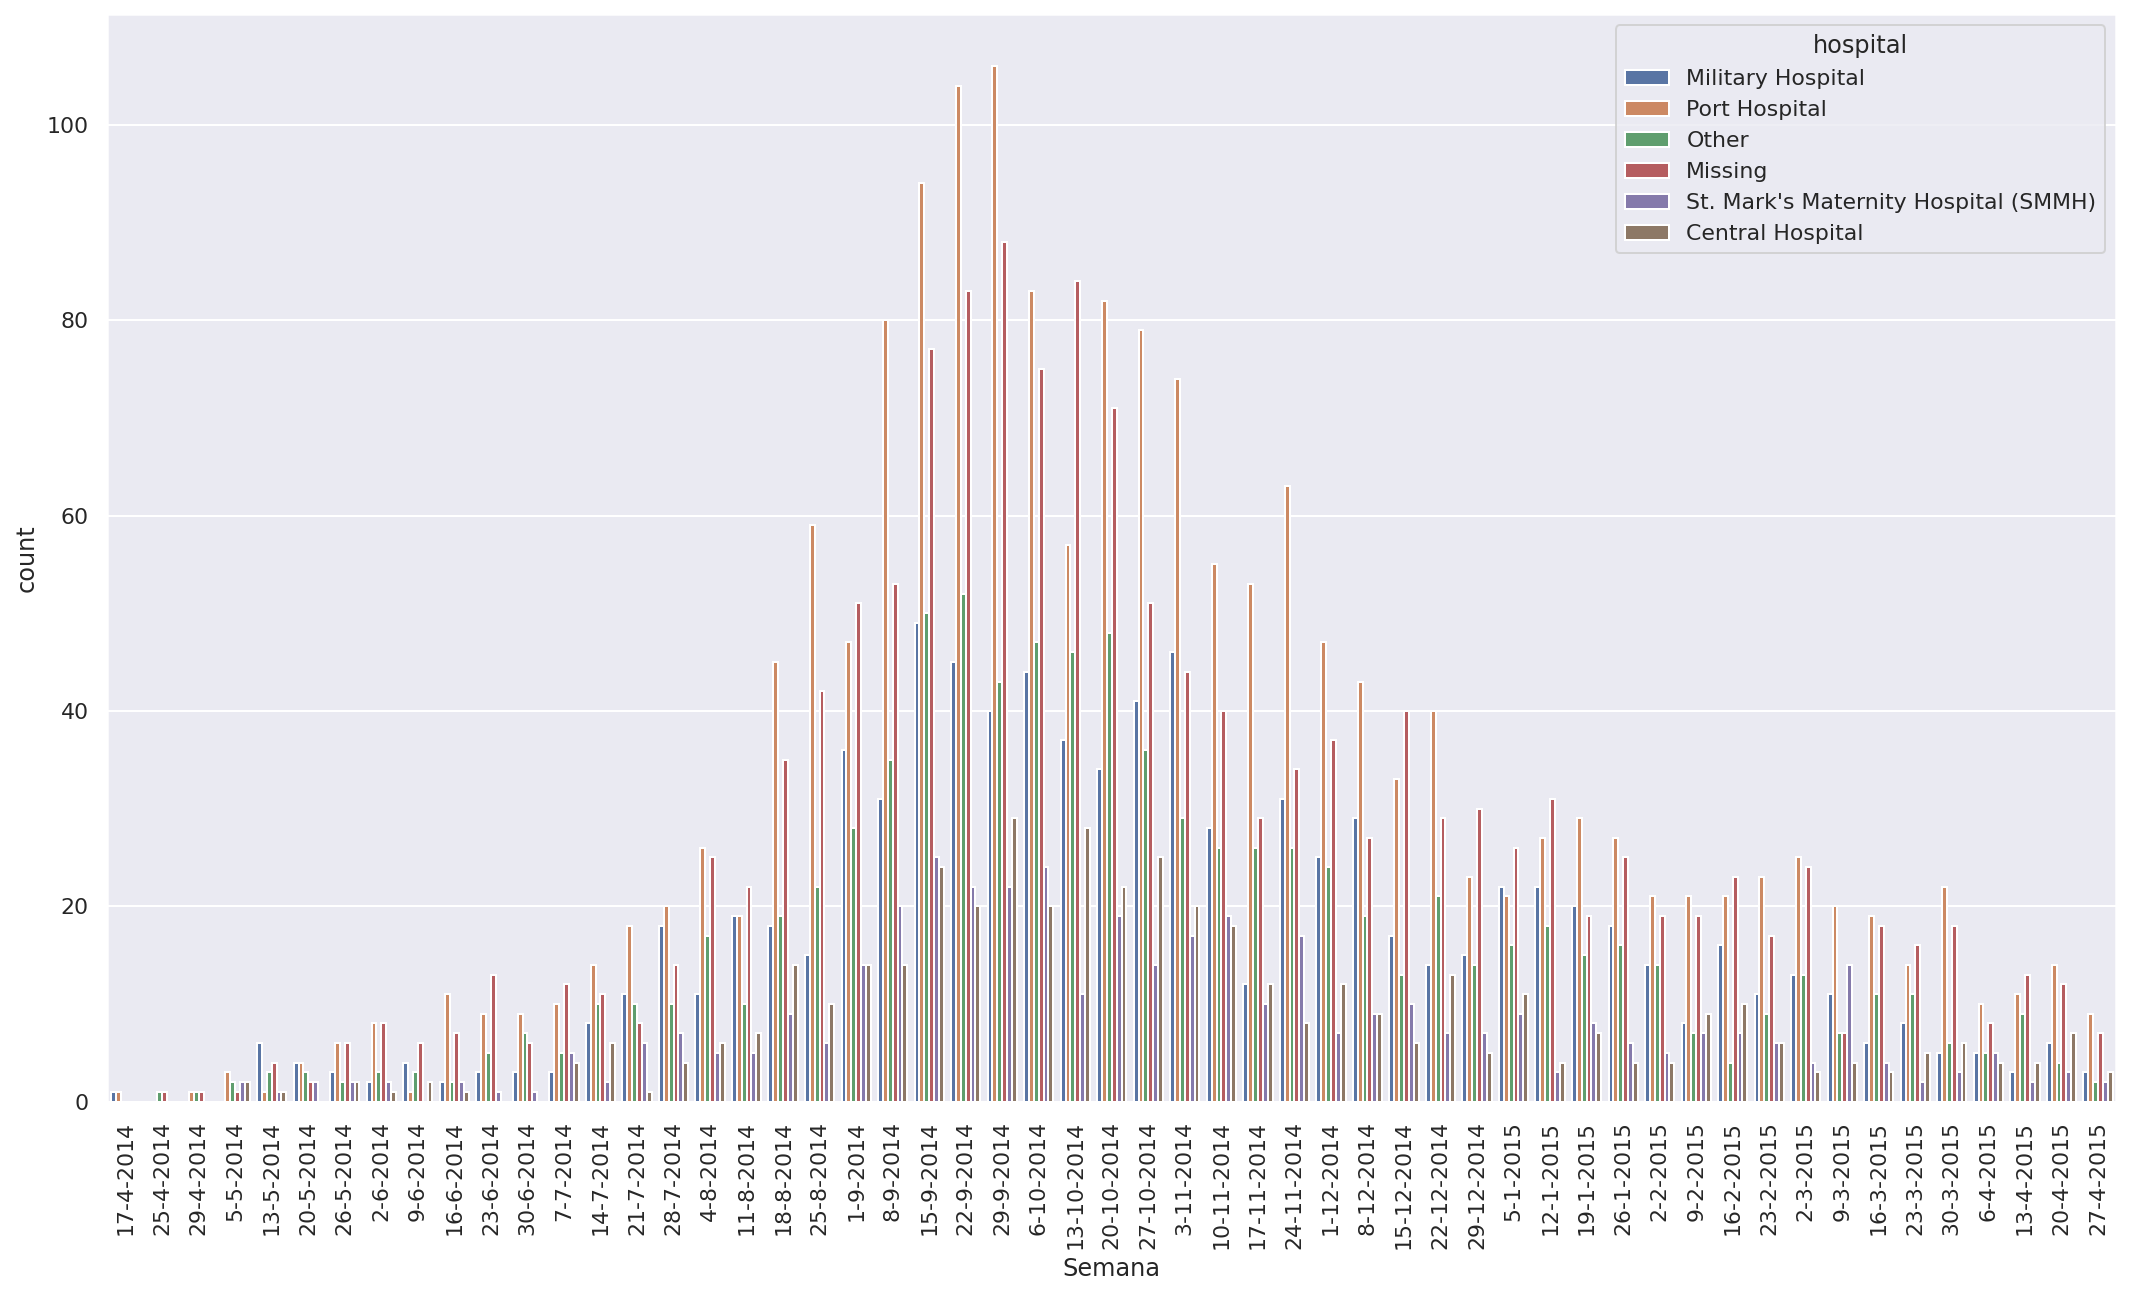

In [9]:
plt.figure(figsize=(18,10))
plt.xticks(
    rotation=90, 
)
sns.countplot(x='Semana', hue='hospital', data=hospitals_sorted)

Vemos que en cada semana en los diferentes hospitales la distribución de los casos agregados siguen distribuciones normales, además vemos que en el hospital "Port Hospital" atienda a más enfermos que los demás hospitales cada semana. De igual forma vemos el comportamiento de la epidemia conforme pasan las semanas y vemos que disminuye el número de hospitalizaciones en cada hospital.

Elabore una gráfica de barras donde se muestre el total de hospitalizaciones por grupo de edad
(age_cat). Todos los grupos de edad deben observarse en una sola grafica.

<AxesSubplot:>

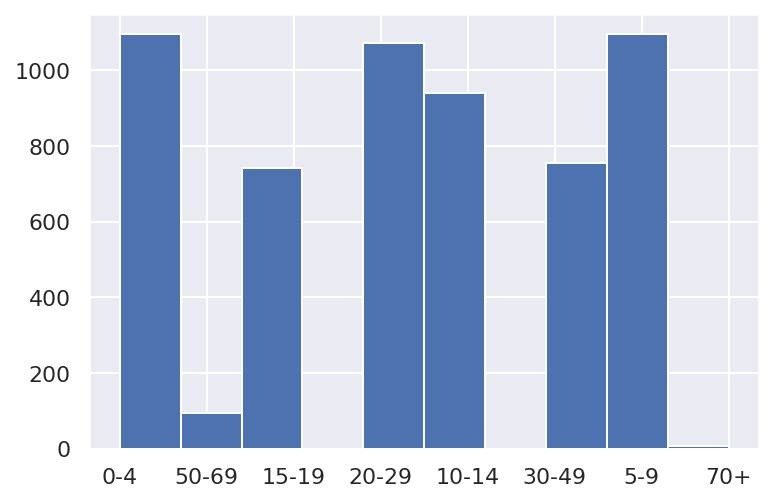

In [10]:
df['age_cat'].hist()

Vemos en este histograma que el grupo de edades que más asisten a los hospitales son de 0 a 4, 5 a 9, y de 14 a 28 años. Esto no da entender que son las personas jóvenes que corren riesgo de contagiarse de ébola. Por otro lado, la población mayor es menos propensa a enfermarse.

Elabore una gráfica de barras que indique el número de casos semanales por salida del
paciente (outcome): recuperado, deceso, no se sabe. Toda la información se requiere en una
sola grafica.

In [11]:
# Obtenemos sólo las columnas que nos interesan
salida_pacientes = df[['date_outcome', 'outcome']]

# Agregamos No se sabe a los elementos de NA para de esta manera contarlos
salida_pacientes.outcome = salida_pacientes['outcome'].fillna('No se sabe')
salida_pacientes

/home/guillermo/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,date_outcome,outcome
0,NaN,No se sabe
1,05/18/2014,Recover
2,05/30/2014,Recover
3,NaN,No se sabe
4,05/29/2014,Recover
...,...,...
5883,05/06/2015,Recover
5884,04/27/2015,Recover
5885,NaN,Recover
5886,NaN,Recover


Dado que hay pacientes que todavia no tienen fecha de salida dado que todavia no se han recuperado, procedemos a descartar esos pacientes.

In [12]:
salida_pacientes_limpio = salida_pacientes.dropna(axis=0, how="any")

In [13]:
# Convertimos las fechas a objetos de tipo Date
salida_pacientes_limpio['Date'] = pd.to_datetime(salida_pacientes_limpio['date_outcome'])
# Ordenamos las fechas
salida_pacientes_ordenados = salida_pacientes_limpio.sort_values(by='Date')
salida_pacientes_ordenados

/tmp/ipykernel_209647/2548078074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salida_pacientes_limpio['Date'] = pd.to_datetime(salida_pacientes_limpio['date_outcome'])


,date_outcome,outcome,Date
4590,04/19/2014,No se sabe,2014-04-19
4599,04/26/2014,Death,2014-04-26
4598,04/30/2014,No se sabe,2014-04-30
4593,04/30/2014,Recover,2014-04-30
4594,05/07/2014,No se sabe,2014-05-07
...,...,...,...
5880,05/20/2015,Recover,2015-05-20
4587,05/20/2015,Recover,2015-05-20
5854,05/23/2015,Recover,2015-05-23
1043,06/01/2015,Recover,2015-06-01


In [14]:
# Calculamos las semanas en base a las fechas ordenadas
col_semana = []
dia_previo = -1
i = 1
for fecha in salida_pacientes_ordenados['Date']:
    if i == 1:
        # Iniciamos con la primer fecha
        fecha_inicio_semana = f'{fecha.day}-{fecha.month}-{fecha.year}'
        
    dia_semana = fecha.day_of_week    
    if dia_semana >= dia_previo:
        # Significa que sigue siendo la misma semana
        #col_semana.append(i)
        i += 1
        col_semana.append(fecha_inicio_semana)
        dia_previo = dia_semana
    else:
        # Significa que ya es otra semana
        fecha_inicio_semana = f'{fecha.day}-{fecha.month}-{fecha.year}'
        i += 1
        # col_semana.append(i)        
        col_semana.append(fecha_inicio_semana)
        dia_previo = dia_semana  

# Agregamos una nueva columna que contendra su semana correspondiente
salida_pacientes_ordenados['Semana'] = col_semana
salida_pacientes_ordenados

,date_outcome,outcome,Date,Semana
4590,04/19/2014,No se sabe,2014-04-19,19-4-2014
4599,04/26/2014,Death,2014-04-26,19-4-2014
4598,04/30/2014,No se sabe,2014-04-30,30-4-2014
4593,04/30/2014,Recover,2014-04-30,30-4-2014
4594,05/07/2014,No se sabe,2014-05-07,30-4-2014
...,...,...,...,...
5880,05/20/2015,Recover,2015-05-20,19-5-2015
4587,05/20/2015,Recover,2015-05-20,19-5-2015
5854,05/23/2015,Recover,2015-05-23,19-5-2015
1043,06/01/2015,Recover,2015-06-01,1-6-2015


<AxesSubplot:xlabel='Semana', ylabel='count'>

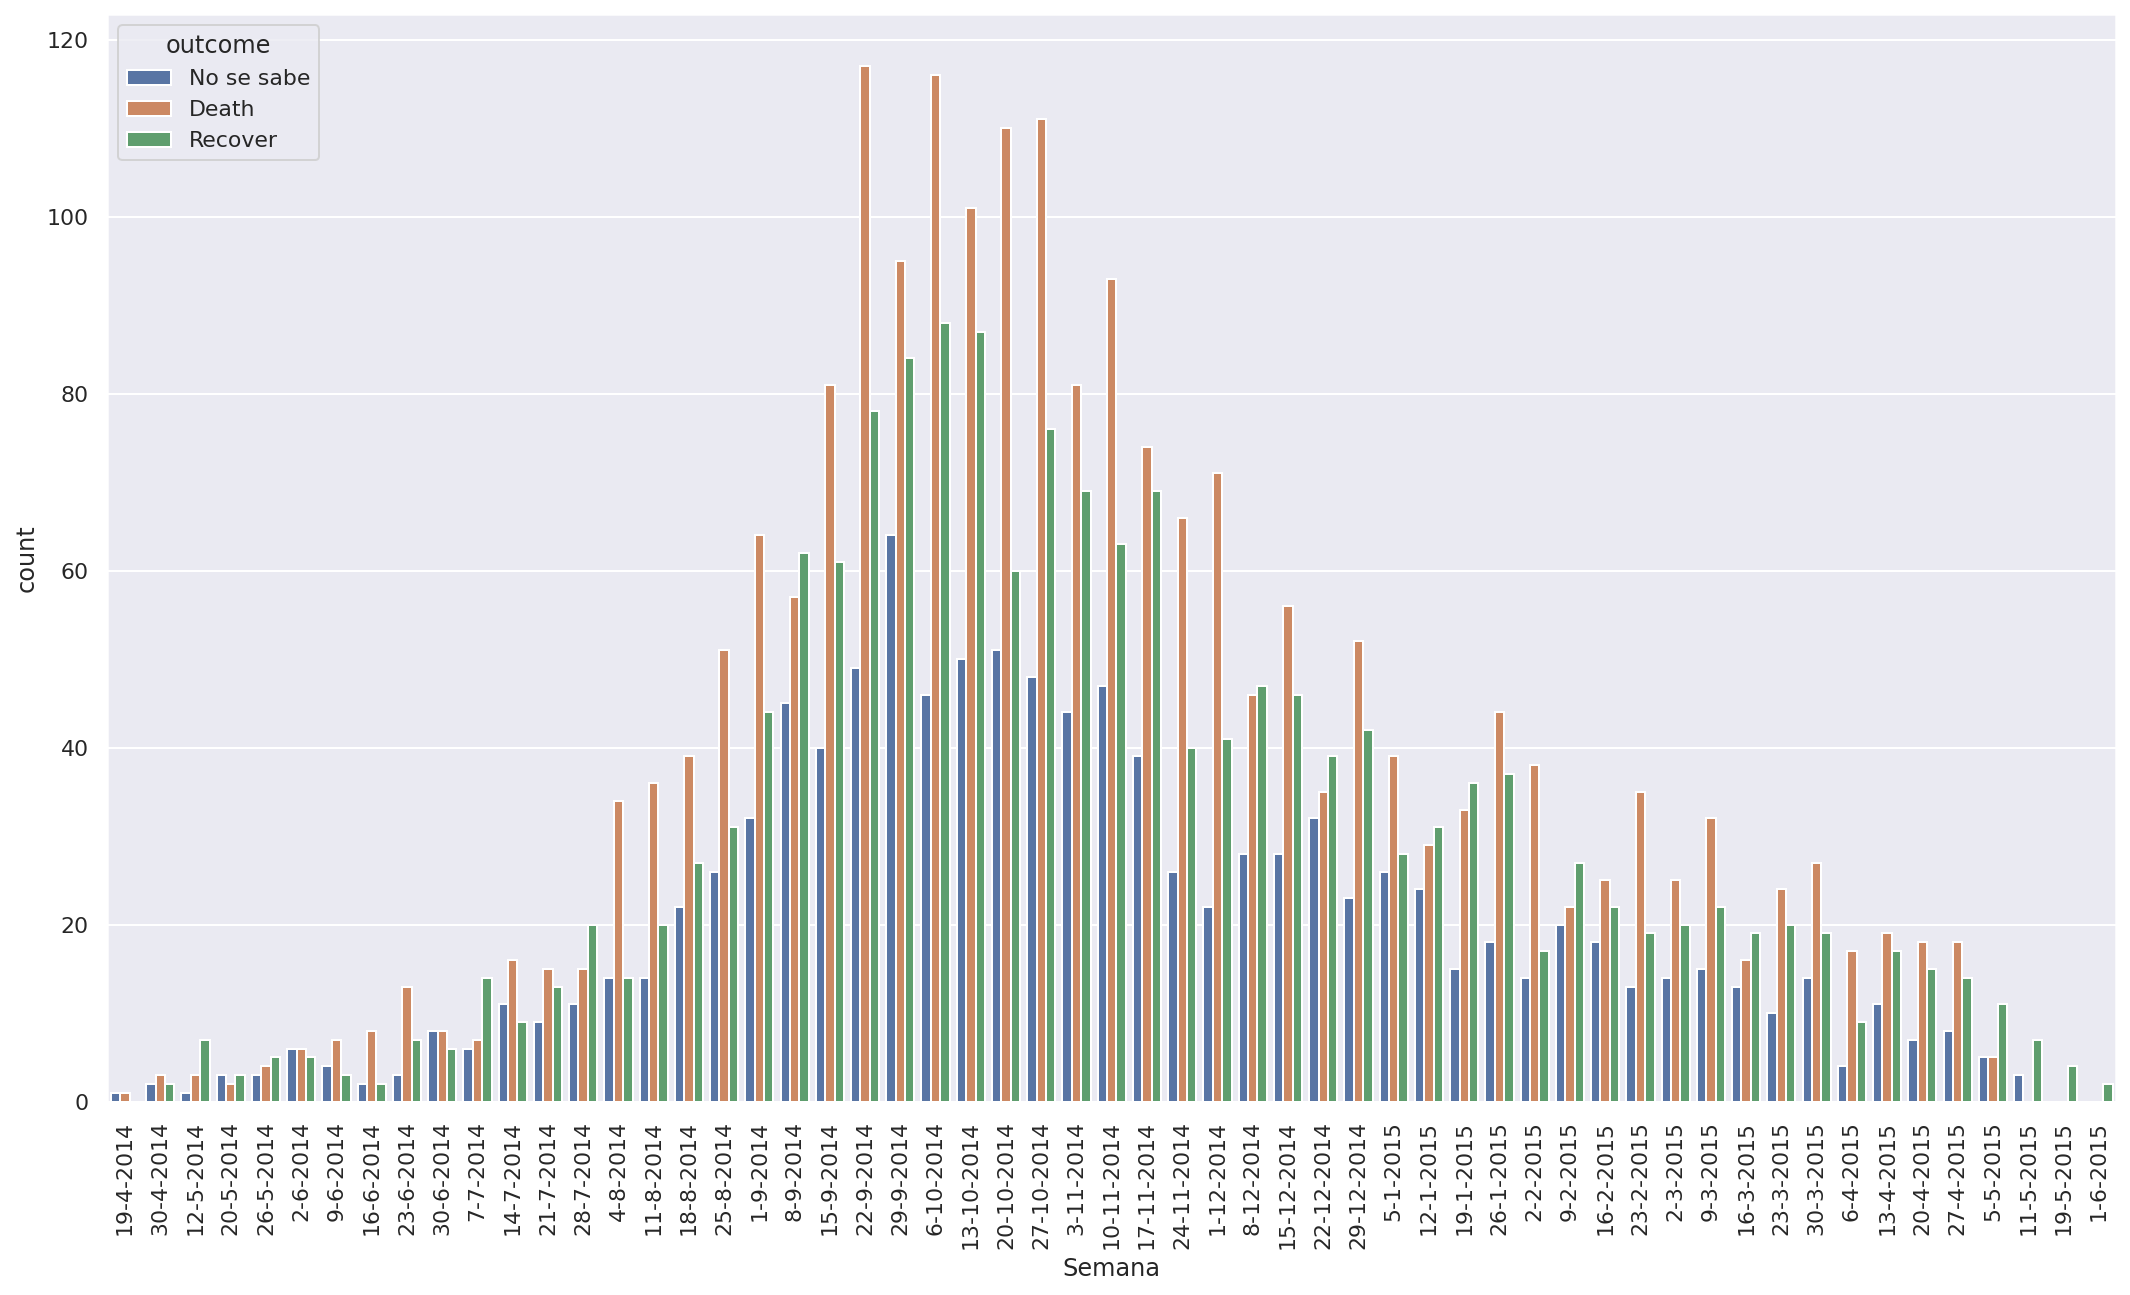

In [15]:
plt.figure(figsize=(18,10))
plt.xticks(
    rotation=90, 
)
sns.countplot(x='Semana', hue='outcome', data=salida_pacientes_ordenados)

Vemos que en la fecha de salida de los pacientes suele predominar más la muerte del paciente que su recuperación. Además vemos que surge una ola por inicios del 4/06/2014 al 15/12/2014 y que va bajando conforme se aumenten las semanas de tal grado que el 19/5/2015 no hubo registro de muerte sobre un paciente que salio del hospital. También vemos que existe una tendencia de no saber sobre la condición de un paciente en su salida.

### Conclusiónes

Vemos que cada gráfica nos ayuda entender diferentes perspectivas de la epidemia que surgió en el 2014. Al inicio al graficar las edades de los pacientes y conocer las distribución nos dimos cuenta que los jóvenes eran más propensos a enfermarse. Luego al ver la gráfica de dispersión vimos que había una relación con las personas jóvenes y su peso. Además que había un equilibrio entre el genero con un mínima cantidad de tendencia con el genero masculina que adquirían la enfermedad. Por último, al conocer la gráficas de hospitalizaciones por semana en cada de los hospitales vimos como evolucionaba el virus y la asistencia en cada uno de los hospitales por la demanda de los paciente, de igual forma pudimos ver que la salida de los pacientes eran mayormente por causa de muerte cada semana, pero que fue bajando conforme pasaban las semanas.